In [2]:
import subprocess
import os

import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup

import json

import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objects as go

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [3]:
data_path="https://covid.ourworldindata.org/data/owid-covid-data.csv"
pd_raw=pd.read_csv(data_path)

In [4]:
pd_raw.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
pd_raw.columns.unique()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
pd_raw=pd_raw.loc[:, ["date","location","total_cases","total_vaccinations", "people_vaccinated", "population"]]

In [7]:
pd_raw.tail(10)

,date,location,total_cases,total_vaccinations,people_vaccinated,population
196306,2022-06-14,Zimbabwe,254155.0,11859510.0,6270096.0,15092171.0
196307,2022-06-15,Zimbabwe,254387.0,11866991.0,6271703.0,15092171.0
196308,2022-06-16,Zimbabwe,254502.0,11874117.0,6274305.0,15092171.0
196309,2022-06-17,Zimbabwe,254753.0,11886084.0,6277180.0,15092171.0
196310,2022-06-18,Zimbabwe,254753.0,11889379.0,6278211.0,15092171.0
196311,2022-06-19,Zimbabwe,254801.0,11895629.0,6281041.0,15092171.0
196312,2022-06-20,Zimbabwe,254831.0,NaN,NaN,15092171.0
196313,2022-06-21,Zimbabwe,254919.0,NaN,NaN,15092171.0
196314,2022-06-22,Zimbabwe,255049.0,NaN,NaN,15092171.0
196315,2022-06-23,Zimbabwe,255136.0,NaN,NaN,15092171.0


In [8]:
pd_raw[pd_raw['location']=='Canada']

,date,location,total_cases,total_vaccinations,people_vaccinated,population
31206,2020-01-23,Canada,2.0,NaN,NaN,38067913.0
31207,2020-01-24,Canada,3.0,NaN,NaN,38067913.0
31208,2020-01-25,Canada,3.0,NaN,NaN,38067913.0
31209,2020-01-26,Canada,3.0,NaN,NaN,38067913.0
31210,2020-01-27,Canada,3.0,NaN,NaN,38067913.0
...,...,...,...,...,...,...
32084,2022-06-19,Canada,3925888.0,86042203.0,32765451.0,38067913.0
32085,2022-06-20,Canada,3927161.0,86048427.0,32765810.0,38067913.0
32086,2022-06-21,Canada,3929591.0,86832930.0,33171865.0,38067913.0
32087,2022-06-22,Canada,3932564.0,86861879.0,33173487.0,38067913.0


In [9]:
country_list=['Italy',
              'Canada',
              'Spain',
              'Germany',
              
             ] 

In [10]:
# pd_raw[~((pd_raw.location == 'Canada') & (pd_raw.location == 'Germany') & (pd_raw.location == 'Italy') & (pd_raw.location == 'Spain'))]

df_plot=pd_raw[pd_raw['location'].isin(country_list)]

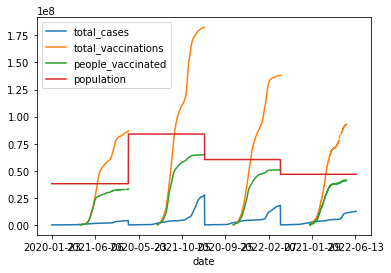

In [11]:
df_plot.set_index('date').plot()

In [12]:
df_plot.to_csv('../data/processed/COVID2022_small_flat_table.csv',sep=';',index=False)

In [12]:
df_processed=pd.read_csv('../data/processed/COVID2022_small_flat_table.csv',sep=';')

In [13]:
df_processed.sort_values('date',ascending=True).tail()

,date,location,total_cases,total_vaccinations,people_vaccinated,population
881,2022-06-22,Canada,3932564.0,86861879.0,33173487.0,38067913.0
882,2022-06-23,Canada,3937332.0,86943283.0,33178559.0,38067913.0
2636,2022-06-23,Italy,18071634.0,138155194.0,50799223.0,60367471.0
1761,2022-06-23,Germany,27681775.0,NaN,NaN,83900471.0
3510,2022-06-23,Spain,12613634.0,NaN,NaN,46745211.0


In [15]:
df_processed.total_cases.isna().unique()

array([False])

<Figure size 432x288 with 0 Axes>

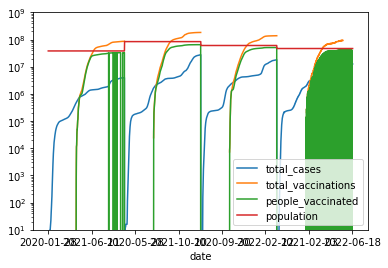

In [20]:
plt.figure();
#slice data frame as some columns are not needed in the grap
ax=df_processed.iloc[5:,:].set_index('date').plot()
plt.ylim(10, 1000000000)
#to plot graphs in exponential domain
ax.set_yscale('log')

In [30]:
def plot_fig(country_list, df_sub, col_name, title, xaxis_label, yaxis_label, yrange, browser_renderer=False):    
    fig = go.Figure()
    ## defines how to plot the individual trace
    for each in country_list:
        df = df_sub[df_sub['location'] == each]
        df['Result'] = (df[col_name]/ df['population']*100).round(2)
        fig.add_trace(go.Scatter(x=df['date'],
                                    y=df['Result'],
                                    mode='markers+lines',
                                    opacity=0.9,
                                    line_width=1,
                                    marker_size=4, 
                                    name=each
                                     )
                         )

    ## defines the overall layout properties
    fig.update_layout(
        width=1024,
        height=860,
        title_font_family="Times New Roman",
        title=title,
#         "Covid-19 infected size over time for countries",
        xaxis_title=xaxis_label,
#         "Time",
        yaxis_title=yaxis_label,
#         "Confirmed infected people per population size(in %)",
        title_x=0.5,
    )
    fig.update_yaxes(type="linear",range=yrange)


    fig.update_layout(xaxis_rangeslider_visible=True)
    if(browser_renderer):
        fig.show(renderer='browser')
    fig.show()

In [31]:
plot_fig(country_list, df_processed, "total_cases", "Covid-19 infected size over time for countries", 
         "Time", "Confirmed infected people per population size(in %)",[0,40], browser_renderer=False)

C:\Users\Rohit\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
df_processed.people_vaccinated.isna()

0       True
1       True
2       True
3       True
4       True
        ... 
3506    True
3507    True
3508    True
3509    True
3510    True
Name: people_vaccinated, Length: 3511, dtype: bool

In [18]:
df_processed['people_vaccinated'] = df_processed['people_vaccinated'].replace('nan', np.nan).fillna(0)

In [32]:
plot_fig(country_list, df_processed, "people_vaccinated", "Covid-19 Vaccination size over time for countries", 
         "Time", "Total people vaccinated per population size(in %)",[0,100], browser_renderer=False)

C:\Users\Rohit\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

